In [54]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to split , Encode data and to get final report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# XGBoost
from xgboost import XGBClassifier

# For Scaling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#To evaluate performance
from sklearn.model_selection import cross_val_score

Download the Dataset

In [55]:
df = pd.read_csv("/content/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preprocessing

In [56]:
df.shape

(614, 13)

In [57]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [58]:
# Drop Loan_ID
df = df.drop('Loan_ID', axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [60]:
#Handling Missing Values

# Fill missing values with mode or median
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

# Converting to Number
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].astype(int)


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 57.7+ KB


Data Visualization and Analysis
(Univariate)

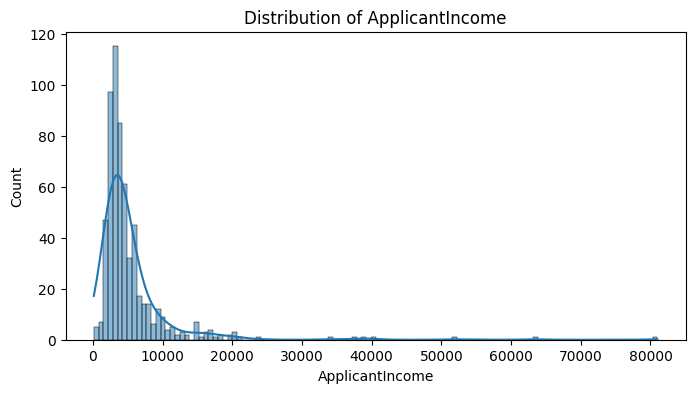

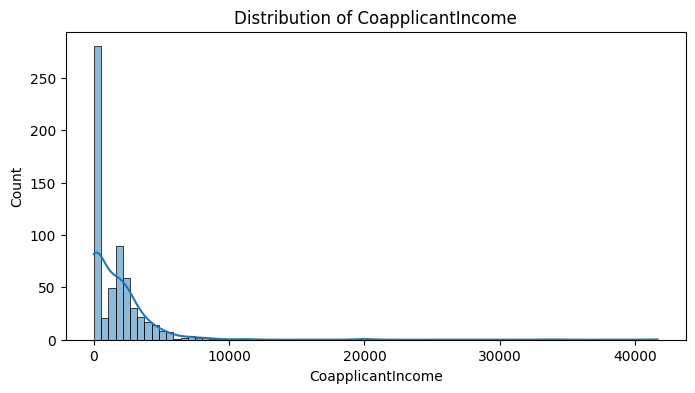

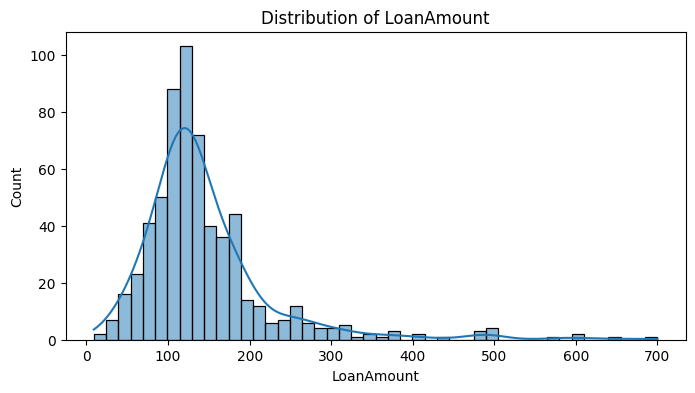

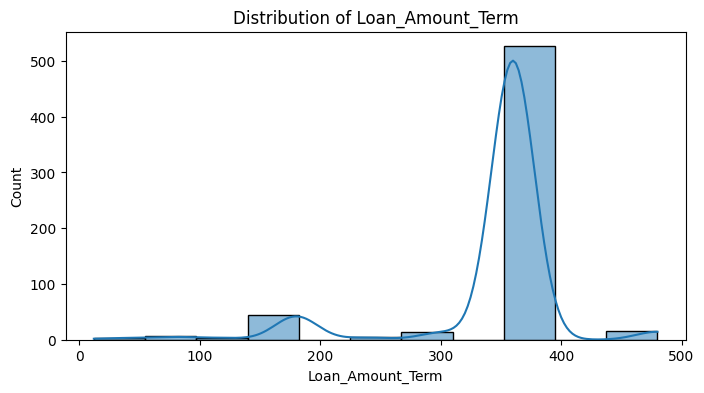

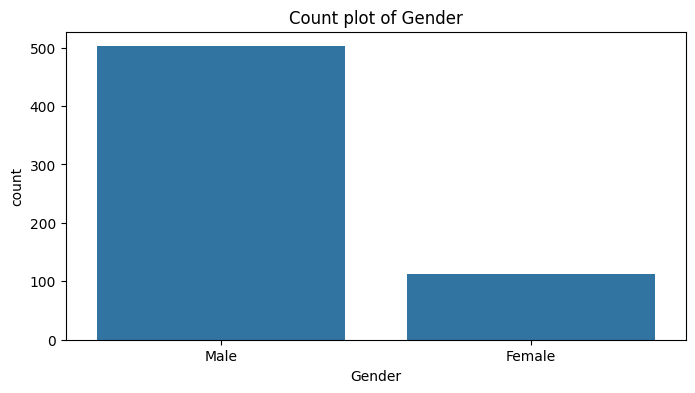

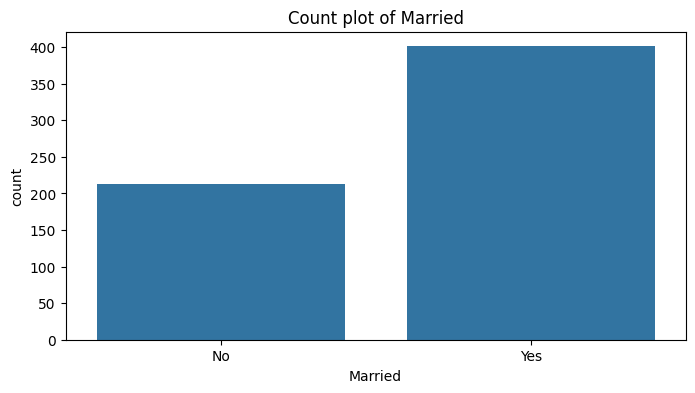

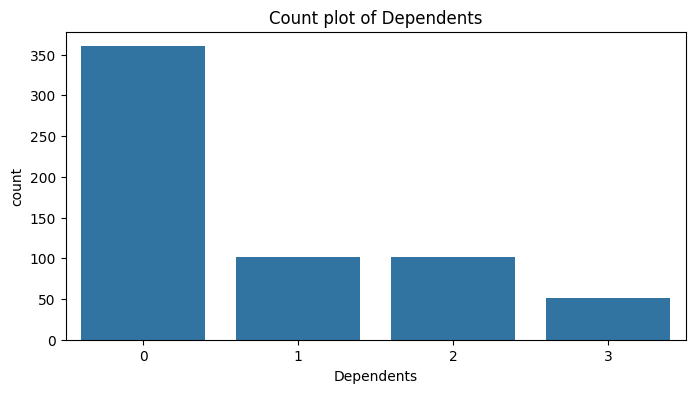

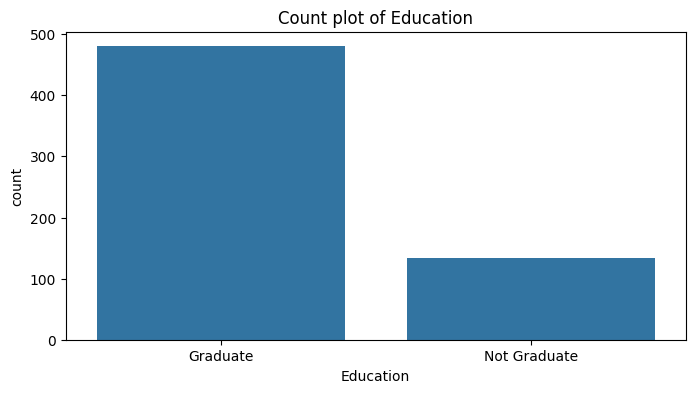

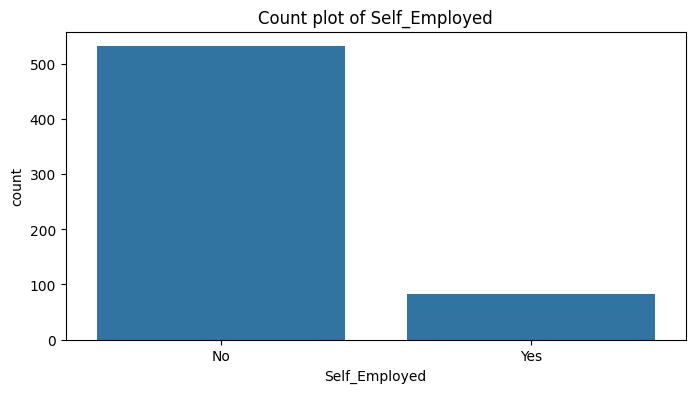

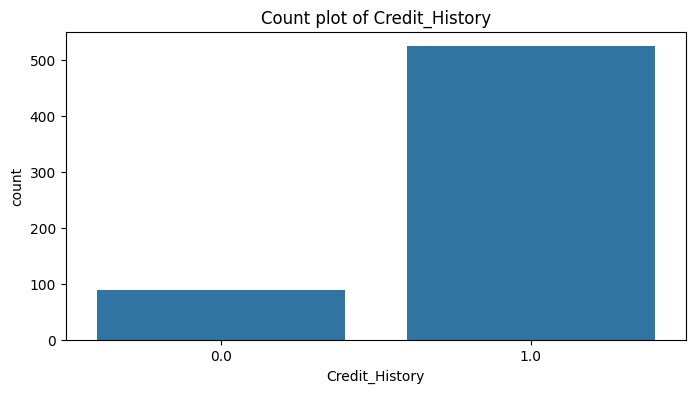

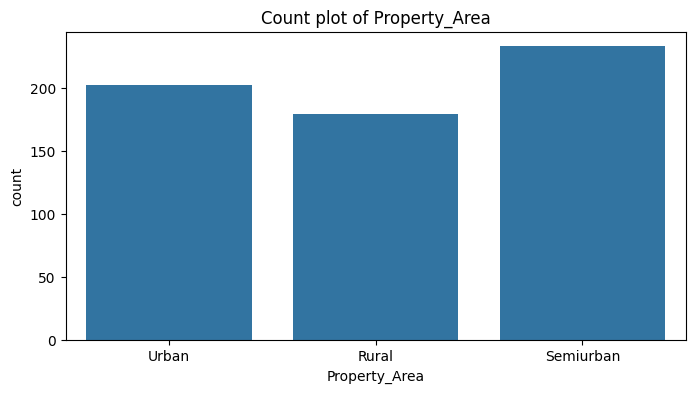

In [62]:
# Numerical features
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical features
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Count plot of {col}')
    plt.show()

Bivariate

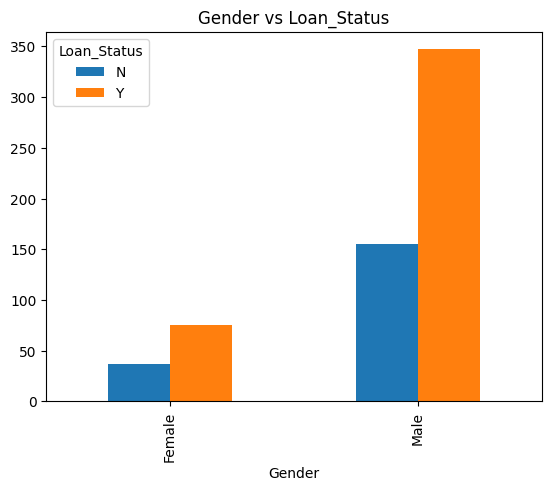

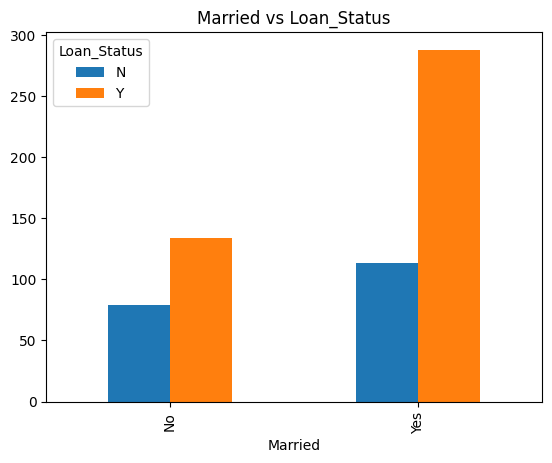

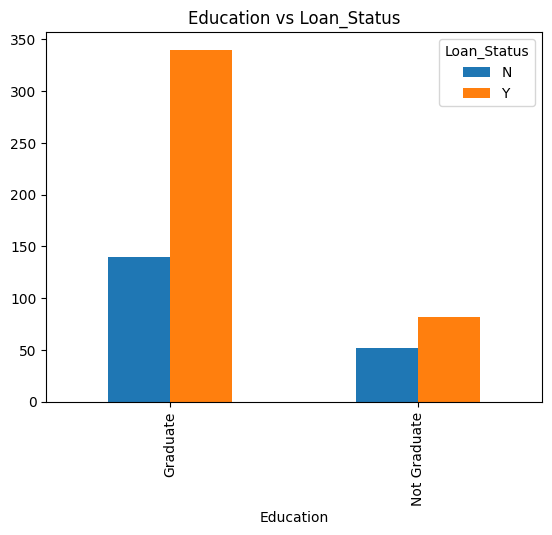

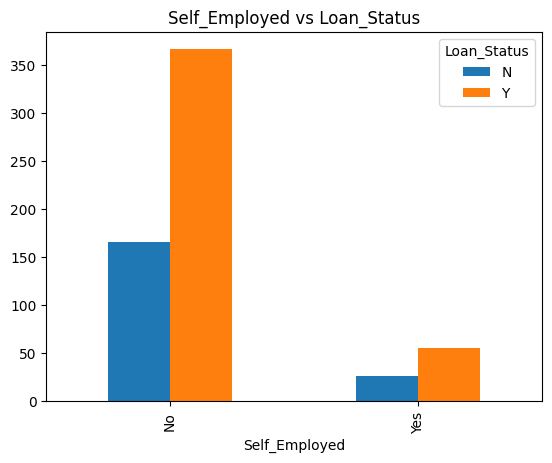

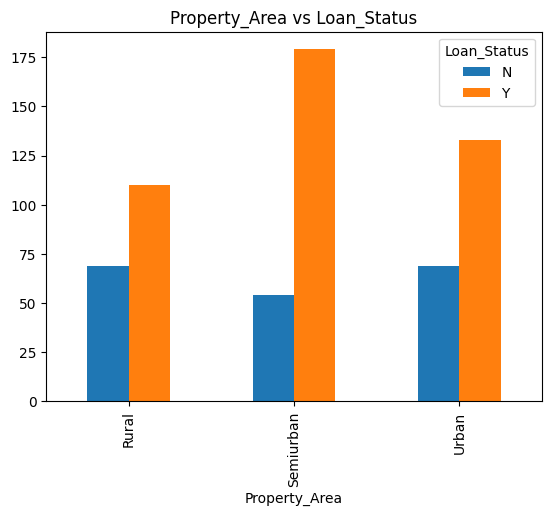

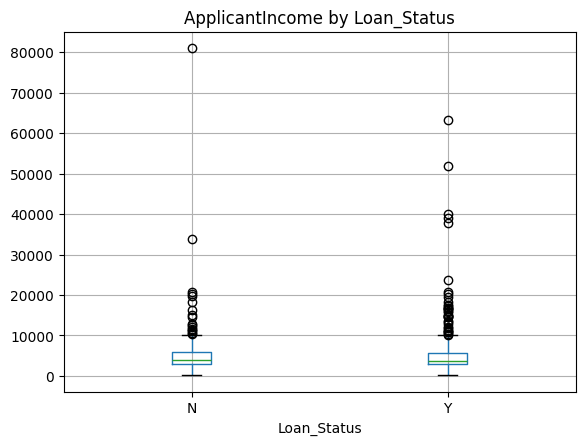

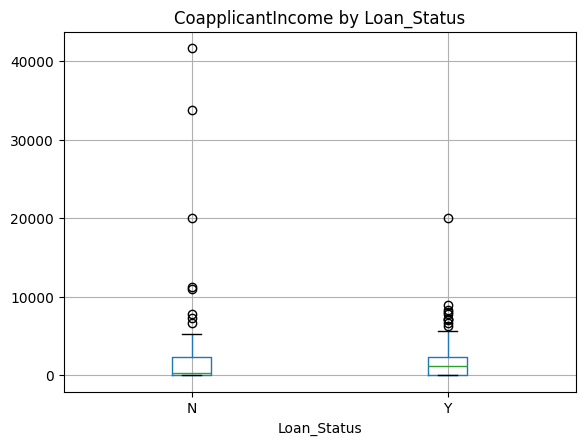

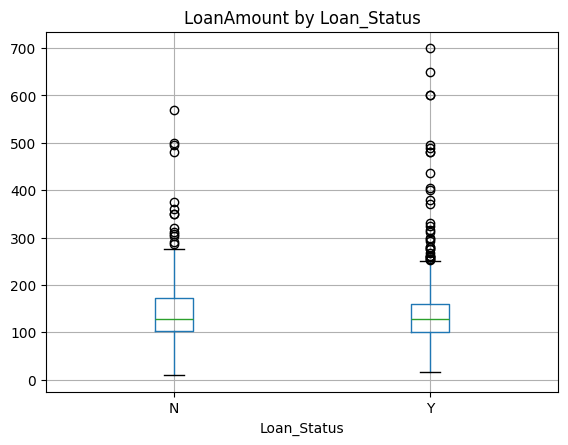

In [63]:
#Categorical features
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    pd.crosstab(df[col], df['Loan_Status']).plot(kind='bar')
    plt.title(f'{col} vs Loan_Status')
    plt.show()

#Numerical features
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    df.boxplot(column=col, by='Loan_Status')
    plt.title(f'{col} by Loan_Status')
    plt.suptitle('')
    plt.show()

Multivariate Analysis

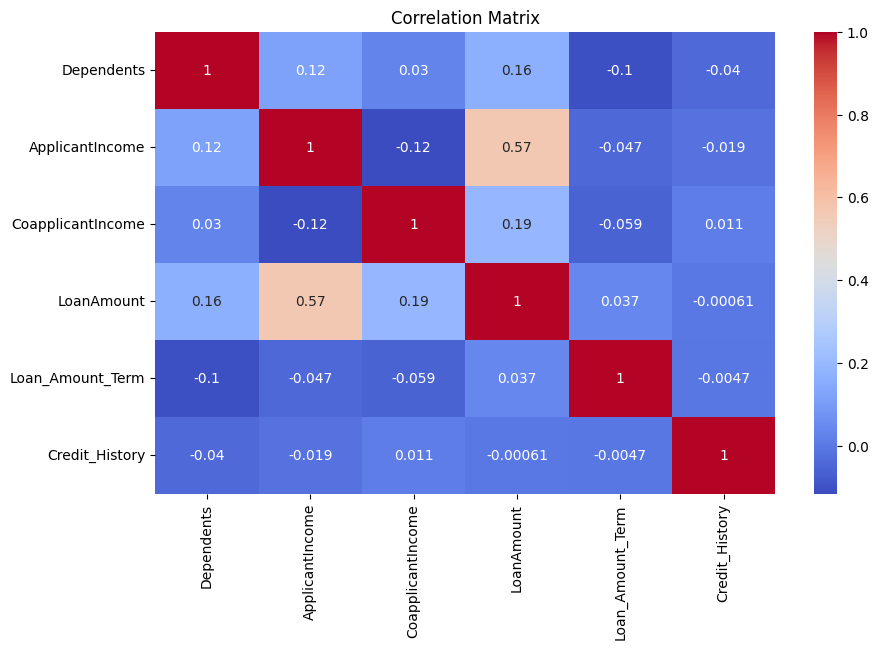

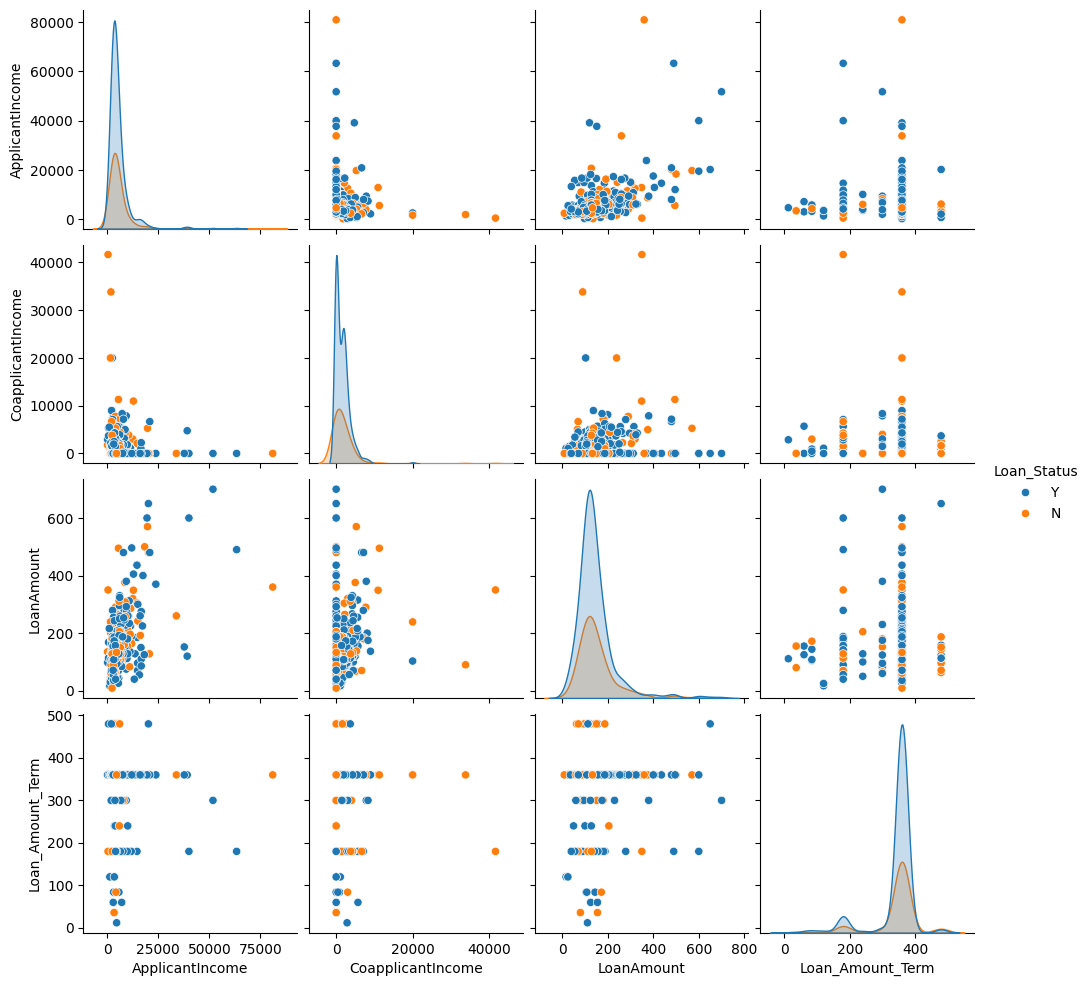

In [64]:
# Correlation matrix
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot for numerical features
sns.pairplot(df[num_cols + ['Loan_Status']], hue='Loan_Status')
plt.show()

Descriptive statistics

In [65]:
print(df.describe())
print(df.describe(include='object'))

       Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  614.000000       614.000000         614.000000  614.000000   
mean     0.744300      5403.459283        1621.245798  145.752443   
std      1.009623      6109.041673        2926.248369   84.107233   
min      0.000000       150.000000           0.000000    9.000000   
25%      0.000000      2877.500000           0.000000  100.250000   
50%      0.000000      3812.500000        1188.500000  128.000000   
75%      1.000000      5795.000000        2297.250000  164.750000   
max      3.000000     81000.000000       41667.000000  700.000000   

       Loan_Amount_Term  Credit_History  
count        614.000000      614.000000  
mean         342.410423        0.855049  
std           64.428629        0.352339  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.000000        1.000000  


Handling Categorical Dataset

In [66]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)


In [67]:
print(X.columns.tolist())
print("Total Features:", len(X.columns))


['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']
Total Features: 12


Balancing And Scaling

In [68]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train Target Distribution:")
print(y_train.value_counts())

print("Test Target Distribution:")
print(y_test.value_counts())


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_smote, y_train_smote, test_size=0.2, random_state=42
)

Train Target Distribution:
Loan_Status
1    337
0    154
Name: count, dtype: int64
Test Target Distribution:
Loan_Status
1    85
0    38
Name: count, dtype: int64


In [69]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,5849,0.0,128.0,360.0,1.0,True,False,False,False,False,True
1,1,4583,1508.0,128.0,360.0,1.0,True,True,False,False,False,False
2,0,3000,0.0,66.0,360.0,1.0,True,True,False,True,False,True
3,0,2583,2358.0,120.0,360.0,1.0,True,True,True,False,False,True
4,0,6000,0.0,141.0,360.0,1.0,True,False,False,False,False,True


In [70]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


Model Buidling

Validation Results:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        64
           1       0.83      0.73      0.78        71

    accuracy                           0.78       135
   macro avg       0.78      0.78      0.78       135
weighted avg       0.78      0.78      0.78       135



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:25:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


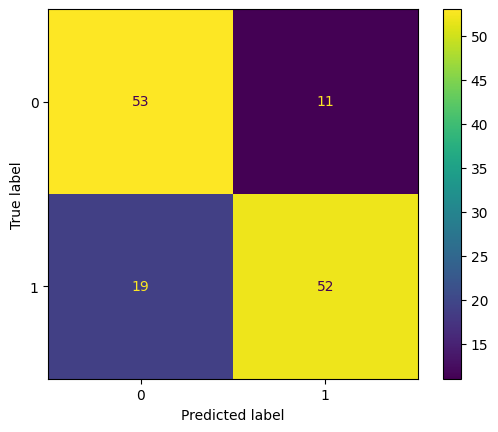

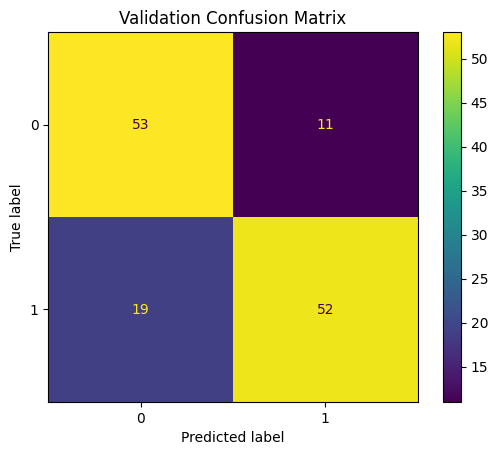

Test Set Results:
              precision    recall  f1-score   support

           0       0.64      0.71      0.68        38
           1       0.86      0.82      0.84        85

    accuracy                           0.79       123
   macro avg       0.75      0.77      0.76       123
weighted avg       0.80      0.79      0.79       123



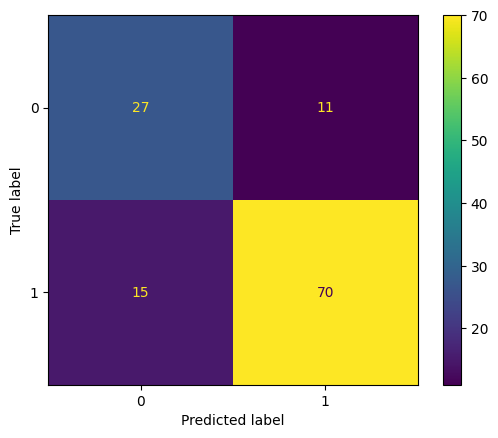

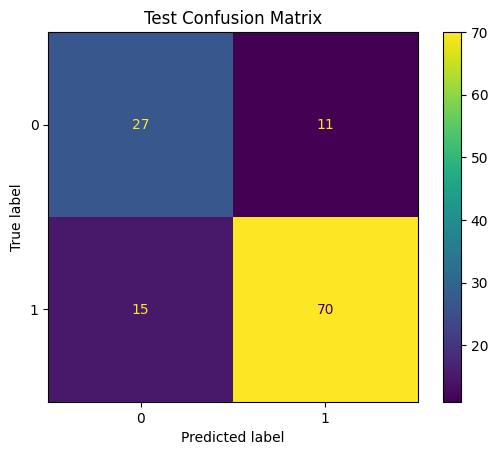


🔹 XGBoost Accuracy: 0.7886
              precision    recall  f1-score   support

           0       0.64      0.71      0.68        38
           1       0.86      0.82      0.84        85

    accuracy                           0.79       123
   macro avg       0.75      0.77      0.76       123
weighted avg       0.80      0.79      0.79       123

Confusion Matrix:
 [[27 11]
 [15 70]]

📊 Model Accuracies:
XGBoost: 0.7886


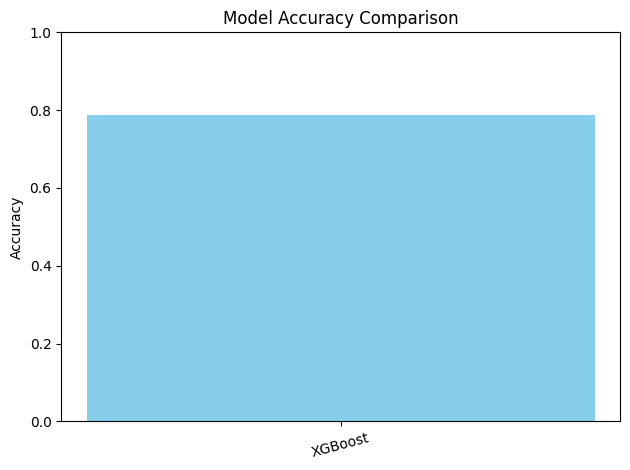

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Create different models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Create model dictionary
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# To store accuracy results
results = {}

# Step 2: Train and evaluate each model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train_final, y_train_final)

val_preds = model.predict(X_val)
print("Validation Results:")
print(classification_report(y_val, val_preds))
ConfusionMatrixDisplay.from_predictions(y_val, val_preds).plot()
plt.title("Validation Confusion Matrix")
plt.show()

test_preds = model.predict(X_test_scaled)
print("Test Set Results:")
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds).plot()
plt.title("Test Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, test_preds) # Calculate accuracy
results["XGBoost"] = accuracy
print(f"\n🔹 XGBoost Accuracy: {accuracy:.4f}")
print(classification_report(y_test, test_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_preds))


# Step 3: Print all accuracies
print("\n📊 Model Accuracies:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

#Bar Chart for Comparison
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'green', 'red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Evaluating Performance

In [72]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

scores = cross_val_score(xgb, X_train_smote, y_train_smote, cv=5)

print("Cross-validation scores:", scores)
print("Average CV Accuracy: {:.4f}".format(scores.mean()))


ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.


Cross-validation scores: [0.7037037  0.75555556 0.75555556 0.82962963 0.8358209 ]
Average CV Accuracy: 0.7761


Ensemble Learning

In [73]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

#Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # scale training data
X_test_scaled = scaler.transform(X_test)         # scale test data

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

# Create voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('gb', gb), ('lr', lr)
], voting='soft')

# Train ensemble model on scaled data
voting_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test_scaled)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Voting Classifier Accuracy: 0.8211382113821138
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.85      0.91      0.88        85

    accuracy                           0.82       123
   macro avg       0.80      0.77      0.78       123
weighted avg       0.82      0.82      0.82       123



Saving Model

In [74]:
import pickle
#Save model and scaler for Flask
with open('final_model.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)